In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dan Preprocessing

In [10]:
df = pd.read_csv("//DatasetAoL.csv")
df

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah target kasus tb,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Jumlah Penduduk Miskin (ribu),Persentase Penduduk Miskin,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
0,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,83,12,"7,257","7,799",197776.311600,0.613343,2.358111,1.0,0.0
1,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,85,7,"7,432","7,823",202545.617700,0.628133,2.414976,0.0,0.0
2,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,31,8,"2,756",578,75109.758130,0.232930,0.895543,0.0,0.0
3,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,30,3,"2,647","1,891",72139.161750,0.223718,0.860124,0.0,0.0
4,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,70,3,"6,158","5,402",167825.069200,0.520458,2.000999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,33402,8033,"55,924","13,033",10011.108180,1.873261,0.070469,1.0,NaN
263,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,41749,10040,"42,150","13,127",13113.677640,2.453808,0.092308,NaN,NaN
264,JAKARTA BARAT,KEMBANGAN,SRENGSENG,58025,13955,"58,583","12,753",10124.134390,1.894410,0.071264,NaN,NaN
265,JAKARTA BARAT,KEMBANGAN,JOGLO,123030,29588,"52,555","11,471",4895.918665,0.916116,0.034463,NaN,NaN


#### Menampilkan informasi basic

In [11]:
print("Dataset Shape:", df.shape)

Dataset Shape: (267, 12)


#### Mencari jumlah missing values

In [12]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
nama_kabupaten_kota                         0
nama_kecamatan                              0
nama_kelurahan                              0
jumlah target kasus tb                      0
jumlah penderita tb                         0
jumlah_penduduk_wni_wna                     0
jumlah_kepadatan                            0
Garis Kemiskinan (rupiah/kapita/bulan)      0
Jumlah Penduduk Miskin (ribu)               0
Persentase Penduduk Miskin                  0
Jumlah Rumah Sakit Umum                    96
Jumlah Rumah Sakit Khusus                 133
dtype: int64


#### Mengisi kolom 'Jumlah Rumah Sakit Umum' dan 'Jumlah Rumah Sakit Khusus' dengan angka 0

In [13]:
df[['Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']] = df[['Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']].fillna(0)

#### Menghasilkan statistik deskriptif dalam dataframe

In [14]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       jumlah target kasus tb  jumlah penderita tb  \
count              267.000000           267.000000   
mean              3472.138577           808.588015   
std              10394.223643          2504.227311   
min                 30.000000             3.000000   
25%                861.000000           198.000000   
50%               1686.000000           345.000000   
75%               2601.500000           569.000000   
max             123030.000000         29588.000000   

       Garis Kemiskinan (rupiah/kapita/bulan)  Jumlah Penduduk Miskin (ribu)  \
count                              267.000000                     267.000000   
mean                             26418.084921                       3.765658   
std                              26283.108985                       3.973534   
min                               1121.220004                       0.124217   
25%                              12589.491185                       1.079793   
50%        

#### Mengonversi dan membersihkan kolom 'jumlah_penduduk_wni_wna' dan 'jumlah_kepadatan' yang mungkin berisi nilai numerik dalam format string, termasuk koma sebagai pemisah ribuan.

In [15]:
cols_to_convert = ['jumlah_penduduk_wni_wna', 'jumlah_kepadatan']
df[cols_to_convert] = df[cols_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
df

,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah target kasus tb,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Jumlah Penduduk Miskin (ribu),Persentase Penduduk Miskin,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
0,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,83,12,7257,7799,197776.311600,0.613343,2.358111,1.0,0.0
1,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,85,7,7432,7823,202545.617700,0.628133,2.414976,0.0,0.0
2,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,31,8,2756,578,75109.758130,0.232930,0.895543,0.0,0.0
3,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,30,3,2647,1891,72139.161750,0.223718,0.860124,0.0,0.0
4,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,70,3,6158,5402,167825.069200,0.520458,2.000999,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,JAKARTA BARAT,KEMBANGAN,MERUYA UTARA,33402,8033,55924,13033,10011.108180,1.873261,0.070469,1.0,0.0
263,JAKARTA BARAT,KEMBANGAN,MERUYA SELATAN,41749,10040,42150,13127,13113.677640,2.453808,0.092308,0.0,0.0
264,JAKARTA BARAT,KEMBANGAN,SRENGSENG,58025,13955,58583,12753,10124.134390,1.894410,0.071264,0.0,0.0
265,JAKARTA BARAT,KEMBANGAN,JOGLO,123030,29588,52555,11471,4895.918665,0.916116,0.034463,0.0,0.0


#### Menghitung metrik terkait penyakit TBC berdasarkan data yang ada dalam dataframe, yaitu prevalensi TBC dan tingkat deteksi TBC

In [16]:
df['tb_prevalence'] = (df['jumlah penderita tb'] / df['jumlah_penduduk_wni_wna']) * 1000
df['tb_detection_rate'] = df['jumlah penderita tb'] / df['jumlah target kasus tb']

#### Mencari fitur yang relevan dalam dataset untuk proses clustering

In [17]:
features = ['jumlah penderita tb', 'jumlah_penduduk_wni_wna', 'jumlah_kepadatan',
            'Garis Kemiskinan (rupiah/kapita/bulan)', 'Persentase Penduduk Miskin', 'tb_prevalence',
            'Jumlah Rumah Sakit Umum', 'Jumlah Rumah Sakit Khusus']

X = df[features].copy()

#### Standarisasi data menggunakan RobustScaler karena tahan terhadap outlier

In [18]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

#### Mencoba mencari optimal K menggunakan silhouette method

In [19]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(X_scaled)

    if k > 1:
        labels = agglomerative.labels_
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

#### Visualisasi plot optimal K

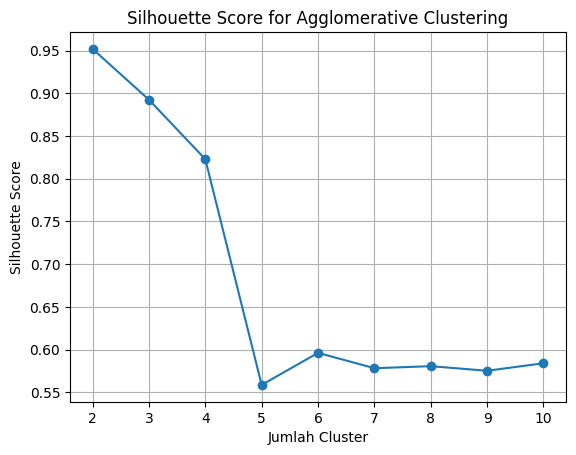

In [20]:
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [21]:
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan silhouette score: {optimal_k}")

Jumlah cluster optimal berdasarkan silhouette score: 2


#### Melihat korelasi antar fitur dengan correlation matrix

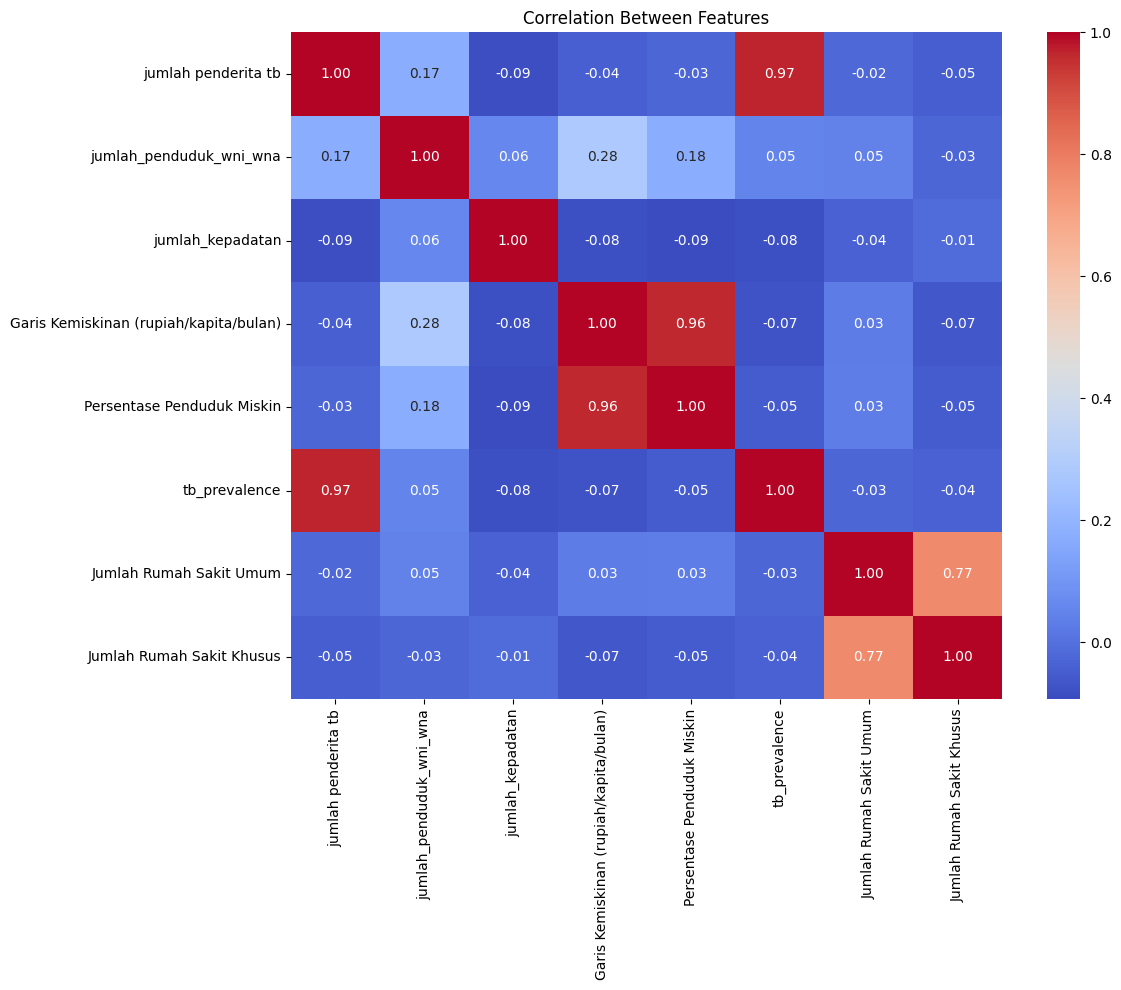

In [22]:
correlation = df[features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

## Modeling

In [23]:
agglo = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage='complete')
df['cluster'] = agglo.fit_predict(X_scaled)

#### Silhouette Score sebelum PCA

In [24]:
silhouette_agglo = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score (Before PCA): {silhouette_agglo:.4f}")

Silhouette Score (Before PCA): 0.6014


#### Mengurangi dimensi dengan menggunakan Principal Component Analysis

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#### Menunjukkan fitur mana yang memiliki pengaruh terbesar dalam mengubah dimensi data

In [26]:
feature_importance = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components_)])
feature_importance

,jumlah penderita tb,jumlah_penduduk_wni_wna,jumlah_kepadatan,Garis Kemiskinan (rupiah/kapita/bulan),Persentase Penduduk Miskin,tb_prevalence,Jumlah Rumah Sakit Umum,Jumlah Rumah Sakit Khusus
PC1,0.404869,0.004107,-0.004783,-0.00548,-0.010542,0.91425,-0.006417,-0.002474
PC2,0.013800,0.016680,-0.012883,0.04051,0.114686,0.00265,0.975460,0.181777


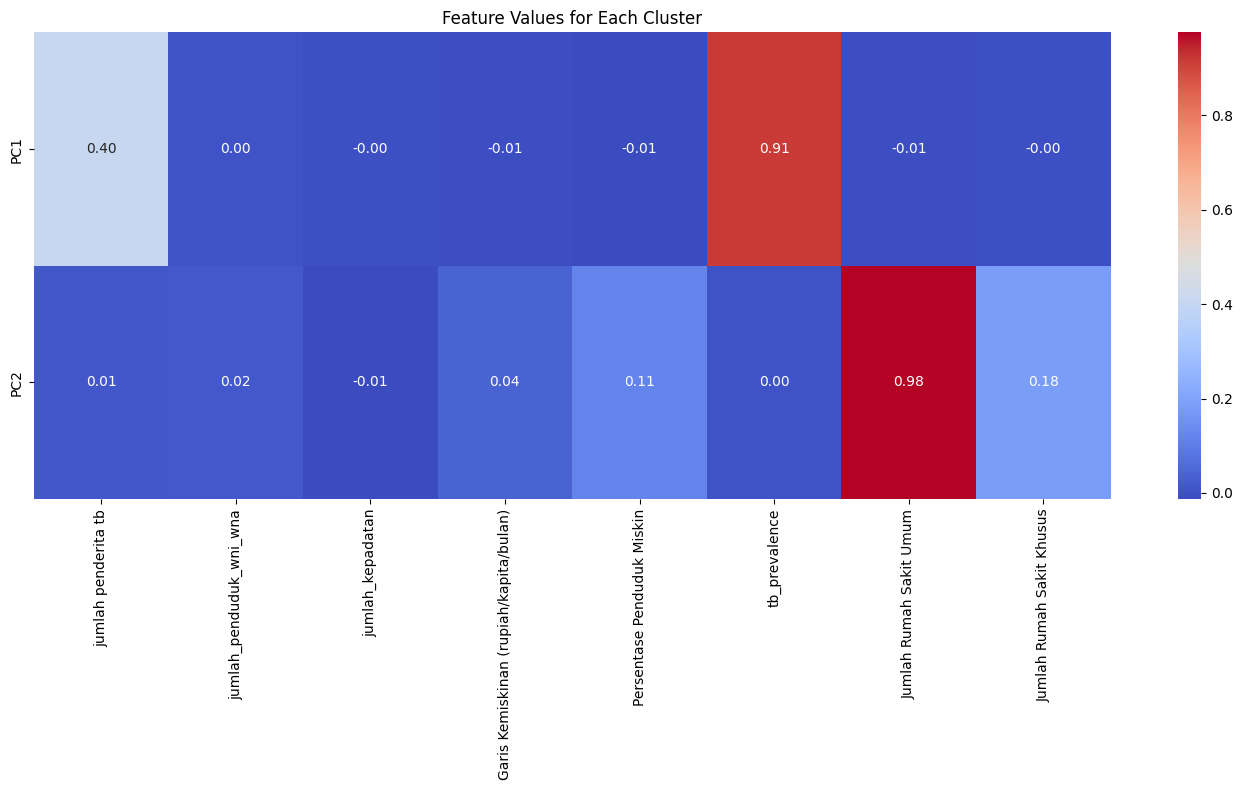

In [27]:
plt.figure(figsize=(14, 8))
sns.heatmap(feature_importance, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Values for Each Cluster')
plt.tight_layout()
plt.show()

In [28]:
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': df['cluster'],
    'District': df['nama_kecamatan'],
    'Subdistrict': df['nama_kelurahan'],
    'TB_Cases': df['jumlah penderita tb']
})

In [29]:
agglo = AgglomerativeClustering(distance_threshold=10, n_clusters=None, linkage='complete')
df['cluster'] = agglo.fit_predict(X_pca)

#### Silhouette Score setelah PCA

In [30]:
silhouette_agglo = silhouette_score(X_pca, df['cluster'])
print(f"Silhouette Score (PCA + Agglomerative Clustering): {silhouette_agglo:.4f}")

Silhouette Score (PCA + Agglomerative Clustering): 0.7854


#### Menganalisa hasil clusterization yang telah dilakukan sebelumnya

In [31]:
cluster_analysis = df.groupby('cluster').agg({
    'jumlah target kasus tb': 'mean',
    'jumlah penderita tb': 'mean',
    'jumlah_penduduk_wni_wna': 'mean',
    'jumlah_kepadatan': 'mean',
    'Garis Kemiskinan (rupiah/kapita/bulan)': 'mean',
    'Persentase Penduduk Miskin': 'mean',
    'tb_prevalence': 'mean',
    'tb_detection_rate': 'mean',
    'Jumlah Rumah Sakit Umum': 'mean',
    'Jumlah Rumah Sakit Khusus': 'mean'
}).reset_index()

# Ubah nama kolom agar lebih bersih
cluster_analysis.columns = ['cluster', 'target_tb', 'penderita_tb', 'penduduk', 'kepadatan',
                            'garis_kemiskinan', 'persen_miskin', 'tb_prevalence',
                            'tb_detection_rate', 'rs_umum', 'rs_khusus']

#### Jumlah data per cluster

In [32]:
unique, counts = np.unique(df['cluster'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 242 data points
Cluster 1: 12 data points
Cluster 2: 2 data points
Cluster 3: 3 data points
Cluster 4: 2 data points
Cluster 5: 2 data points
Cluster 6: 2 data points
Cluster 7: 1 data points
Cluster 8: 1 data points


#### Mencari optimal K setelah PCA

In [33]:
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agglomerative.fit(X_pca)

    if k > 1:
        labels = agglomerative.labels_
        silhouette_avg = silhouette_score(X_pca, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

In [34]:
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Jumlah cluster optimal berdasarkan silhouette score: {optimal_k}")

Jumlah cluster optimal berdasarkan silhouette score: 2


In [35]:
for k in range(2, 6):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"n_clusters={k}, silhouette_score={score:.4f}")

n_clusters=2, silhouette_score=0.9667
n_clusters=3, silhouette_score=0.9347
n_clusters=4, silhouette_score=0.9052
n_clusters=5, silhouette_score=0.7844


#### Visualisasi distribusi data per cluster

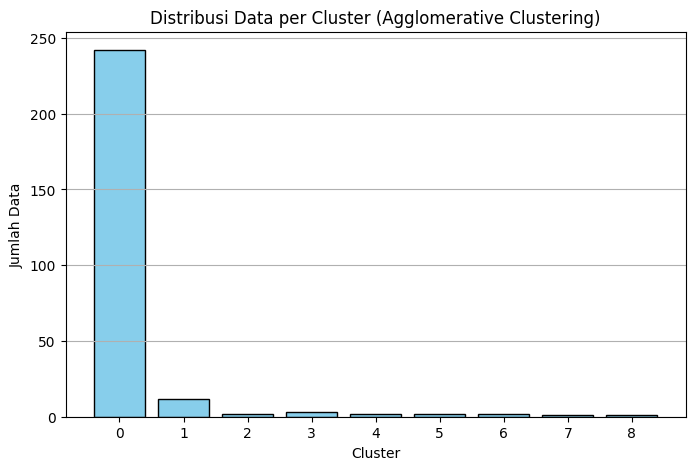

Cluster 0: 242 data points
Cluster 1: 12 data points
Cluster 2: 2 data points
Cluster 3: 3 data points
Cluster 4: 2 data points
Cluster 5: 2 data points
Cluster 6: 2 data points
Cluster 7: 1 data points
Cluster 8: 1 data points


In [36]:
unique, counts = np.unique(df['cluster'], return_counts=True)

# Plot distribusi cluster
plt.figure(figsize=(8,5))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Distribusi Data per Cluster (Agglomerative Clustering)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.xticks(unique)
plt.grid(axis='y')
plt.show()

# Print manual jumlah per cluster juga
unique, counts = np.unique(df['cluster'], return_counts=True)
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} data points")


## Visualisasi Cluster

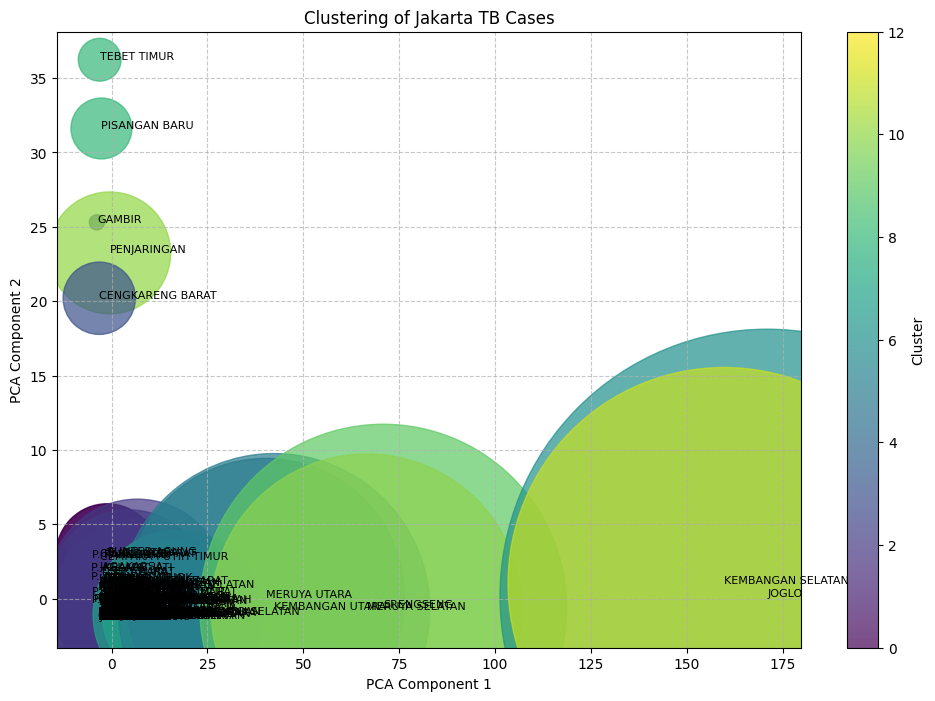

In [37]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'],
                     c=pca_df['Cluster'], cmap='viridis',
                     s=pca_df['TB_Cases']*5, alpha=0.7)

# Add labels for points
for i, txt in enumerate(pca_df['Subdistrict']):
    plt.annotate(txt, (pca_df['PCA1'][i], pca_df['PCA2'][i]), fontsize=8)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering of Jakarta TB Cases')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Distribusi regional cluster

In [38]:
region_cluster = df.groupby(['nama_kabupaten_kota', 'cluster']).size().unstack().fillna(0)
print("\nRegional Distribution of Clusters:")
print(region_cluster)


Regional Distribution of Clusters:
cluster                 0     1    2    3    4    5    6    7    8
nama_kabupaten_kota                                               
JAKARTA BARAT        35.0  12.0  0.0  1.0  2.0  2.0  2.0  1.0  1.0
JAKARTA PUSAT        43.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
JAKARTA SELATAN      64.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
JAKARTA TIMUR        64.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
JAKARTA UTARA        30.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
KAB.ADM.KEP.SERIBU    6.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
